# Ek: Verilerin Kümlenmesi, Sınıflandırılması ve Ölçeklendirilmesi

Bu ek, uygulama kodlarına direkt olarak dahil olmayıp veri setinin standardizasyonu, kümelenmesi ve sınıflandırılmasına ait bazı görseller, ve veri setinin çıktılarını içermektedir. Sunumda değinilen algoritmaları ve bu algoritmaların görselleştirilmesini bu koddan da inceleyebilirsiniz.

##### Veri dosyalarının alınması ve düzenlenmesi

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
UserSongs=pd.read_excel("UsersAndSongs.xlsx")
UserNumericDf=pd.read_excel("UsersLogical.xlsx")
UserNumericNp=[]

In [3]:
for i in np.array(UserNumericDf):
    i=np.delete(i,0)
    UserNumericNp.append(i)
UserNumericDf=pd.DataFrame(UserNumericNp,columns=["age","musical_konwledge","acoustic","classical","jazz","pop","rock","hip-hop","world-music"])
UserNumericNp=np.array(UserNumericNp)

In [4]:
UserNumericDf

,age,musical_konwledge,acoustic,classical,jazz,pop,rock,hip-hop,world-music
0,20,3,2,1,0,1,24,0,2
1,34,7,0,1,1,2,0,1,25
2,47,10,1,24,1,1,3,0,0
3,30,5,0,0,2,3,0,1,24
4,37,7,1,1,2,0,1,1,24
...,...,...,...,...,...,...,...,...,...
19872,18,6,0,0,3,1,25,1,0
19873,17,4,0,0,1,0,25,3,1
19874,36,7,1,1,24,0,0,2,2
19875,52,9,1,24,1,1,1,2,0


In [5]:
UserNumericNp

array([[20,  3,  2, ..., 24,  0,  2],
       [34,  7,  0, ...,  0,  1, 25],
       [47, 10,  1, ...,  3,  0,  0],
       ...,
       [36,  7,  1, ...,  0,  2,  2],
       [52,  9,  1, ...,  1,  2,  0],
       [39,  6,  2, ...,  2,  1,  0]], dtype=int64)

##### Verilerin Standardizasyonu

In [6]:
scaler=preprocessing.StandardScaler().fit(UserNumericNp)
UserNumericNpScaled=scaler.transform(UserNumericNp)

In [7]:
UserNumericDfScaled=pd.DataFrame(list(UserNumericNpScaled))

In [8]:
UserNumericDfScaled

,0,1,2,3,4,5,6,7,8
0,-0.672031,-1.149409,-0.284227,-0.389945,-0.520277,-0.401945,2.389418,-0.515286,-0.267466
1,0.768091,0.556658,-0.523303,-0.389945,-0.400364,-0.282596,-0.515701,-0.394517,2.542871
2,2.105348,1.836208,-0.403765,2.413066,-0.400364,-0.401945,-0.152561,-0.515286,-0.511843
3,0.356628,-0.296375,-0.523303,-0.511815,-0.280451,-0.163247,-0.515701,-0.394517,2.420682
4,1.076689,0.556658,-0.403765,-0.389945,-0.280451,-0.521295,-0.394655,-0.394517,2.420682
...,...,...,...,...,...,...,...,...,...
19872,-0.877762,0.130142,-0.523303,-0.511815,-0.160538,-0.401945,2.510465,-0.394517,-0.511843
19873,-0.980628,-0.722892,-0.523303,-0.511815,-0.400364,-0.521295,2.510465,-0.152978,-0.389655
19874,0.973823,0.556658,-0.403765,-0.389945,2.357637,-0.521295,-0.515701,-0.273747,-0.267466
19875,2.619677,1.409692,-0.403765,2.413066,-0.400364,-0.401945,-0.394655,-0.273747,-0.511843


##### Kümeleme için en uygun küme sayısının görselleştirilmesi

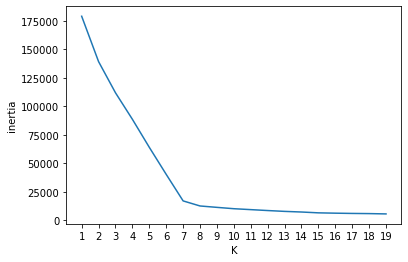

In [11]:
wcss=[]
for k in range(1,20):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(UserNumericDfScaled)
    wcss.append(kmeans.inertia_)
    
plt.figure()
plt.plot(range(1,20),wcss)
plt.xticks(range(1,20))
plt.xlabel("K")
plt.ylabel("inertia")
plt.show()

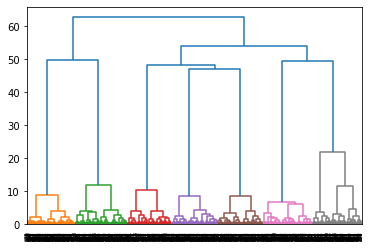

In [12]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg=linkage(UserNumericDfScaled.head(1000),method="ward")
dendrogram(merg,leaf_rotation=90)
plt.show()

##### 7'li Kümeleme işleminin gerçekleştirilmesi

In [9]:
KM1=KMeans(n_clusters=7)
FirstClusters=KM1.fit_predict(UserNumericDfScaled)
UserNumericDfScaled_Predicted=UserNumericDfScaled
UserNumericDfScaled_Predicted["Label1"]=FirstClusters
UserNumericDf_Predicted=UserNumericDf
UserNumericDf_Predicted["Label1"]=FirstClusters

In [10]:
UserNumericDf_Predicted.head(50)

,age,musical_konwledge,acoustic,classical,jazz,pop,rock,hip-hop,world-music,Label1
0,20,3,2,1,0,1,24,0,2,5
1,34,7,0,1,1,2,0,1,25,1
2,47,10,1,24,1,1,3,0,0,6
3,30,5,0,0,2,3,0,1,24,1
4,37,7,1,1,2,0,1,1,24,1
5,20,3,1,1,1,24,1,1,1,3
6,19,10,1,25,1,1,1,1,0,6
7,44,9,0,24,0,2,1,1,2,6
8,15,5,1,1,1,1,25,1,0,5
9,26,7,0,0,25,0,2,0,3,2


##### Etiketlerin Baskın müzik türleriyl ilişkisinin incelenmesi 

In [11]:
dominant_genres=[]
genres=["acoustic","classical","jazz","pop","rock","hip hop","world music"]
for i in list(np.array(UserNumericDf_Predicted)):
    gc=list(i)
    del gc[0]
    del gc[0]
    del gc[7]
    dominant_genre=genres[gc.index(max(gc))]
    dominant_genres.append(dominant_genre)

In [12]:
UserNumericDf_Predicted["Dominant Genre"]=dominant_genres

In [13]:
UserNumericDf_Predicted

,age,musical_konwledge,acoustic,classical,jazz,pop,rock,hip-hop,world-music,Label1,Dominant Genre
0,20,3,2,1,0,1,24,0,2,5,rock
1,34,7,0,1,1,2,0,1,25,1,world music
2,47,10,1,24,1,1,3,0,0,6,classical
3,30,5,0,0,2,3,0,1,24,1,world music
4,37,7,1,1,2,0,1,1,24,1,world music
...,...,...,...,...,...,...,...,...,...,...,...
19872,18,6,0,0,3,1,25,1,0,5,rock
19873,17,4,0,0,1,0,25,3,1,5,rock
19874,36,7,1,1,24,0,0,2,2,2,jazz
19875,52,9,1,24,1,1,1,2,0,6,classical


##### Sınıflandırma ve test etme

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
UserNumericDfScaled_Predicted

,0,1,2,3,4,5,6,7,8,Label1
0,-0.672031,-1.149409,-0.284227,-0.389945,-0.520277,-0.401945,2.389418,-0.515286,-0.267466,5
1,0.768091,0.556658,-0.523303,-0.389945,-0.400364,-0.282596,-0.515701,-0.394517,2.542871,1
2,2.105348,1.836208,-0.403765,2.413066,-0.400364,-0.401945,-0.152561,-0.515286,-0.511843,6
3,0.356628,-0.296375,-0.523303,-0.511815,-0.280451,-0.163247,-0.515701,-0.394517,2.420682,1
4,1.076689,0.556658,-0.403765,-0.389945,-0.280451,-0.521295,-0.394655,-0.394517,2.420682,1
...,...,...,...,...,...,...,...,...,...,...
19872,-0.877762,0.130142,-0.523303,-0.511815,-0.160538,-0.401945,2.510465,-0.394517,-0.511843,5
19873,-0.980628,-0.722892,-0.523303,-0.511815,-0.400364,-0.521295,2.510465,-0.152978,-0.389655,5
19874,0.973823,0.556658,-0.403765,-0.389945,2.357637,-0.521295,-0.515701,-0.273747,-0.267466,2
19875,2.619677,1.409692,-0.403765,2.413066,-0.400364,-0.401945,-0.394655,-0.273747,-0.511843,6


In [16]:
y=UserNumericDfScaled_Predicted["Label1"].values
x=UserNumericDfScaled_Predicted.drop(["Label1"],axis=1)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [18]:
print("x train",x_train.shape)
print("y train",y_train.shape)
print("x test",x_test.shape)
print("y test",y_test.shape)

x train (17889, 9)
y train (17889,)
x test (1988, 9)
y test (1988,)


Text(0, 0.5, 'Doğruluk')

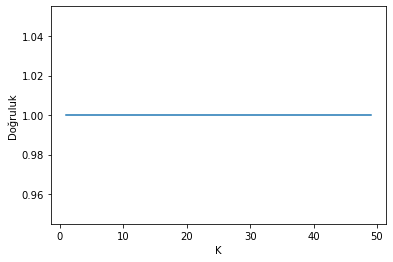

In [19]:
# KNN deneme
#En doğru komşu sayısı
from sklearn.neighbors import KNeighborsClassifier
score_list=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    score_list.append(knn.score(x_test,y_test))
    
plt.plot(range(1,50),score_list)
plt.xlabel("K")
plt.ylabel("Doğruluk")

In [20]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

1.0

In [21]:
#Karar Ağacı ile Deneme
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier=DecisionTreeClassifier()
model=classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

1.0

In [26]:
class_names = list(map(str, UserNumericDfScaled_Predicted["Label1"].values))

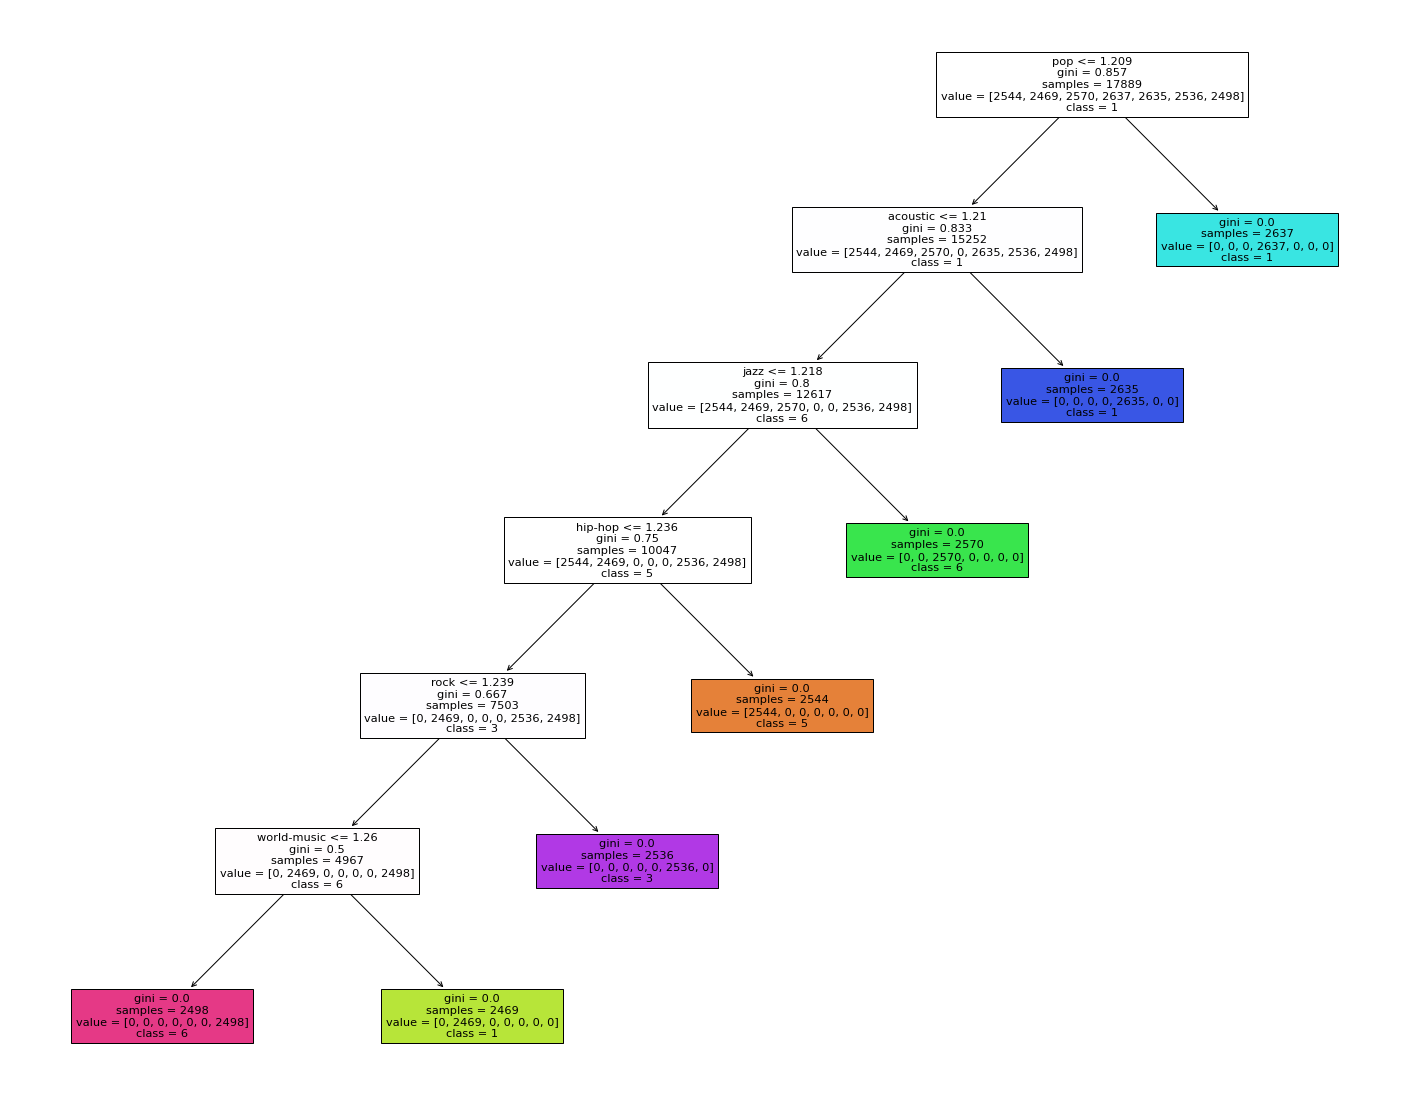

In [27]:
fig=plt.figure(figsize=(25,20))
DTree=tree.plot_tree(classifier,
                    feature_names=list(UserNumericDf.columns),
                    class_names=class_names,filled=True)

##### Tek Kullanıcıya Ait sınıfı Bulma 

In [28]:
x_test

,0,1,2,3,4,5,6,7,8
4178,0.150896,0.983175,-0.523303,-0.389945,2.357637,-0.401945,-0.515701,-0.152978,-0.389655
6301,1.076689,0.556658,-0.284227,-0.511815,-0.520277,-0.521295,-0.394655,-0.273747,2.542871
16652,0.356628,0.130142,-0.523303,-0.146205,-0.400364,-0.401945,-0.394655,-0.515286,2.420682
18421,-0.672031,-1.149409,-0.403765,-0.146205,-0.520277,2.462433,-0.515701,-0.394517,-0.511843
1692,-0.363433,0.983175,-0.284227,2.413066,-0.400364,-0.401945,-0.515701,-0.394517,-0.389655
...,...,...,...,...,...,...,...,...,...
15314,2.516811,1.409692,-0.403765,2.413066,-0.520277,-0.401945,-0.394655,-0.394517,-0.267466
4556,1.591018,1.409692,-0.403765,2.534936,-0.280451,-0.521295,-0.394655,-0.394517,-0.511843
8503,-0.774897,0.130142,-0.284227,-0.389945,-0.400364,-0.401945,2.510465,-0.515286,-0.511843
16249,-1.186360,0.130142,-0.284227,-0.511815,-0.520277,-0.401945,2.389418,-0.152978,-0.511843


In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
model=classifier.fit(x,y)
model.predict(x_test.iloc[[89]])[0]

4